<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/twitter_sentiment_prediction_using_avg_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!unzip '/content/archive (25).zip'

Archive:  /content/archive (25).zip
  inflating: Twitter_Data.csv        


In [ ]:
df=pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df['clean_text'][2]

'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'

In [ ]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162964,why these 456 crores paid neerav modi not reco...,-1.0
162965,dear rss terrorist payal gawar what about modi...,-1.0
162966,did you cover her interaction forum where she ...,0.0
162967,there big project came into india modi dream p...,0.0


In [ ]:
df.duplicated().sum()

0

<Axes: >

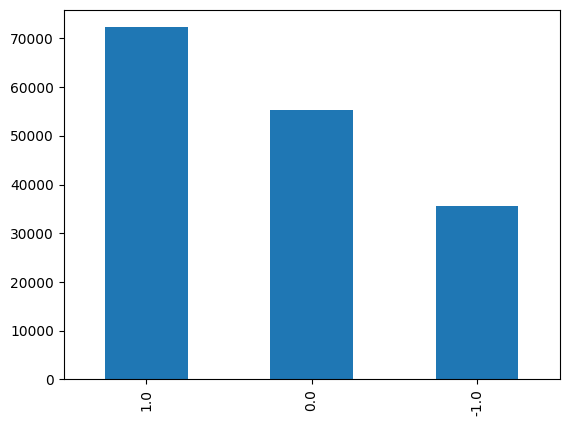

In [ ]:
df['category'].value_counts().plot(kind='bar')

1- Positive                      
0- Neutral                 
-1 - Negative               

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemma=WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
  words=nltk.word_tokenize(text)
  words1=[lemma.lemmatize(word) for word in words if word not in stopwords.words('english')]
  return ' '.join(words1)

In [ ]:
df['preprocess_text']=df['clean_text'].apply(preprocess_text)

In [ ]:
df.head()

,clean_text,category,preprocess_text
0,when modi promised “minimum government maximum...,-1.0,modi promised “ minimum government maximum gov...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


In [ ]:
import gensim
from gensim.models import KeyedVectors

In [ ]:
import gensim.downloader as api

In [26]:
wv=api.load('word2vec-google-news-300')

In [27]:
df['preprocess_text']=df['preprocess_text'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))


In [31]:
def document_vector(doc, wv):
    # Filter out words that are not in the model's vocabulary
    words = [word for word in doc.split() if word in wv.key_to_index]
    if len(words) == 0:
        return np.zeros(wv.vector_size)  # Return zero vector if no words found in the model
    else:
        return np.mean(wv[words], axis=0)

In [32]:
X = []
for doc in df['preprocess_text'].values:
    X.append(document_vector(doc, wv))

In [34]:
y=df['category'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
import pickle

In [48]:
with open('model.pkl','wb') as f:
  pickle.dump(rfc,f)



In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred=rfc.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.6401484935877769

In [63]:
kk="The Modi government has done an excellent job in terms of highway construction"

In [64]:
kk=preprocess_text(kk)

In [65]:
kk=document_vector(kk, wv)

In [66]:
rfc.predict([kk])

array([1.])